<a href="https://colab.research.google.com/github/gonzalezzayra/SIMULACION-I/blob/main/Inventarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Inventarios**

La demanda mensual de un cierto producto sigue la siguiente distribución de probabilidad empírica:

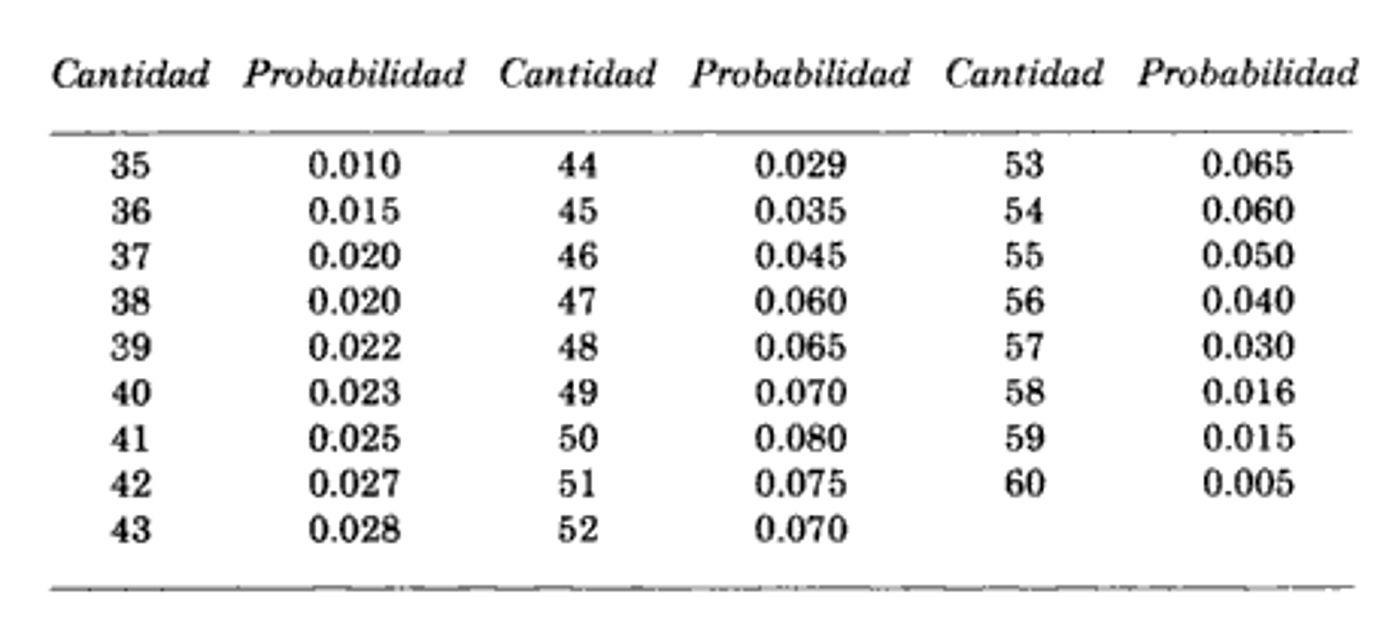

El tiempo de entrega está distribuido de acuerdo a la siguiente función de probabilidad:

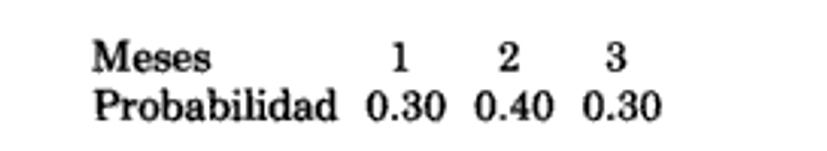

Los factores estacionales para cada uno de los meses del año son como se muestra a continuación:

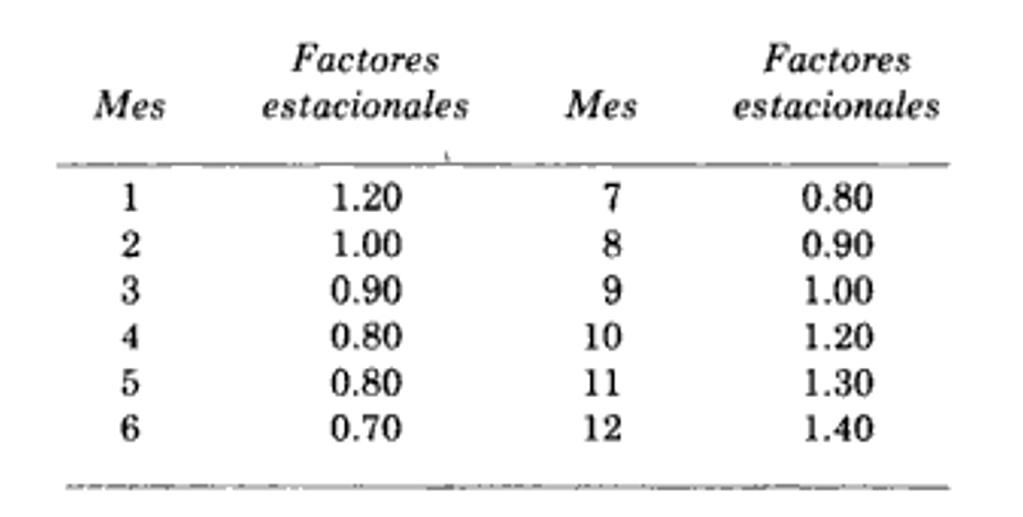

La información con respecto a los costos relevantes es la siguiente:

Costo de ordenar = $100/orden

Costo de inventario = $20/unidad/año

Costo de faltante = $50 /unidad

Si el inventario inicial se asume en 150 unidades, ¿determine la cantidad óptima a ordenar (q) y el nivel óptimo de reorden (R)?

In [108]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import random

In [109]:
#Datos
costo_ordenar = 100 #Costo de ordenar
m = 12 #Meses en un año
costo_inventario = 20/m #Costo de inventario por año entre los meses
costo_faltante = 50 #Costo de faltante

inventario_inicial = 150 #Inventario inicial
q = 200 #Parametros del inventario
R = 100

In [98]:
#Por método de la transformada inversa
def demanda(U):
  if 0 <= U < 0.01: return 35
  elif 0.01 <= U < 0.025: return 36
  elif 0.025 <= U < 0.045: return 37
  elif 0.045 <=  U < 0.065: return 38
  elif 0.065 <= U < 0.087: return 39
  elif 0.087 <= U < 0.11: return 40
  elif 0.11 <= U < 0.135: return 41
  elif 0.135 <= U < 0.162: return 42
  elif 0.162 <= U < 0.190: return 43
  elif 0.190 <= U < 0.219: return 44
  elif 0.219 <= U < 0.254: return 45
  elif 0.254 <= U < 0.299: return 46
  elif 0.299 <= U < 0.359: return 47
  elif 0.359 <= U < 0.424: return 48
  elif 0.424 <= U  < 0.494: return 49
  elif 0.494 <= U < 0.574: return 50
  elif 0.574 <= U  < 0.649: return 51
  elif 0.649 <= U < 0.719: return 52
  elif 0.719 <= U < 0.784: return 53
  elif 0.784 <= U < 0.844: return 54
  elif 0.844 <= U < 0.894: return 55
  elif 0.894 <= U < 0.934: return 56
  elif 0.934 <= U < 0.964: return 57
  elif 0.964 <= U < 0.980: return 58
  elif 0.980 <= U < 0.995: return 59
  elif 0.995 <= U <=1: return 60

In [99]:
#Con diccionarios hacemos los Factores Estacionales
factores_estacionales = {
    1: 1.20, 2: 1.00, 3: 0.90, 4: 0.80, 5: 0.80,
    6: 0.70, 7: 0.80, 8: 0.90, 9: 1.00, 10: 1.20,
    11: 1.30, 12: 1.40}

In [100]:
#Definimos la función entrega, es el tiempo en que esta distribuido el tiempo de entrega
def entrega(U):
  if 0 <= U < 0.30: return 1
  elif 0.30 <= U < 0.70: return 2
  elif 0.70 <= U < 1.0: return 3

In [110]:
#Definimos la función simular_inventario para un periodo de 1 año
def simular_inventario(q, R, inventario_inicial=150, meses=12):
    inventario = inventario_inicial
    #Creamos la lista ordenes pendientes
    ordenes_pendientes = []
    #Inicializamos los totales de cada costo
    costo_total_orden = 0
    costo_total_inventario = 0
    costo_total_faltantes = 0

    for mes in range(1, meses + 1):
        for orden in ordenes_pendientes[:]:
            if orden[1] == mes:
                inventario += orden[0]
                ordenes_pendientes.remove(orden)

        aleatorio= random.random()
        demanda_mes = round(demanda(aleatorio) * factores_estacionales[mes])
        if inventario >= demanda_mes:
            inventario -= demanda_mes
        else:
            faltantes = demanda_mes - inventario
            inventario = 0
            costo_total_faltantes += faltantes * costo_faltante

        costo_total_inventario += inventario * costo_inventario

        if inventario <= R and not any(orden[1] > mes for orden in ordenes_pendientes):
            aleatorio_1= random.random()
            tiempo_entrega = entrega(aleatorio_1)
            ordenes_pendientes.append((q, mes + tiempo_entrega))
            costo_total_orden += costo_ordenar

    return costo_total_orden + costo_total_inventario + costo_total_faltantes


In [112]:
# Simulación con gráfico, para que después se llame
def simular_inventario_con_grafico(q, R, inventario_inicial=150, meses=12):
    inventario = inventario_inicial
    ordenes_pendientes = []
    #Inicializamos totales
    costo_total_orden = 0
    costo_total_inventario = 0
    costo_total_faltantes = 0

    #Creamos listas
    niveles_inventario = []
    demandas = []
    puntos_reorden = []
    llegadas_pedidos = []
    meses_simulados = []

    #Ciclo for para simular cada mes
    for mes in range(1, meses + 1):
        meses_simulados.append(mes)
        puntos_reorden.append(R)

        #Este ciclo for, es para ver si llega un pedido
        for orden in ordenes_pendientes[:]:
            if orden[1] == mes:
                inventario += orden[0]
                ordenes_pendientes.remove(orden)
                llegadas_pedidos.append((mes, orden[0]))
        #Esto es para obtener la demanda del mes
        aleatorio_2 = random.random()
        demanda_mes = round(demanda(aleatorio_2) * factores_estacionales[mes])
        demandas.append(demanda_mes)

        #Ciclo if, si es que se satisface la demanda
        if inventario >= demanda_mes: #Si el inventario es mayor o igual que a la demanda
            inventario -= demanda_mes #Entonces le restamos la demanda del mes al inventario
        else: #Si es que no se cumple, entonces
            faltantes = demanda_mes - inventario #Contamos los faltantes, que es la demanda del mes menos el inventario
            inventario = 0
            costo_total_faltantes += faltantes * costo_faltante #Sacamos el costo total de los faltantes

        #Se guarda el nivel de inventario después de la demanda
        niveles_inventario.append(inventario)
        costo_total_inventario += inventario * costo_inventario #Sacamos el costo total del inventario

        #Hacemoms pedido si no hay pedidos pendientes
        if inventario <= R and not any(orden[1] > mes for orden in ordenes_pendientes):
            aleatorio_3= random.random()
            tiempo_entrega = entrega(aleatorio_3)
            ordenes_pendientes.append((q, mes + tiempo_entrega))
            costo_total_orden += costo_ordenar #Sacamos el costo total de orden

    #Calculamos el costo total, al sumar todos los costos totales
    costo_total = costo_total_orden + costo_total_inventario + costo_total_faltantes

    #Gráfica
    plt.figure(figsize=(14, 7))
    plt.plot(meses_simulados, niveles_inventario, 'b-', label='Nivel de inventario', marker='o', linewidth=2)
    plt.plot(meses_simulados, demandas, 'r--', label='Demanda', alpha=0.7, linewidth=2)
    plt.plot(meses_simulados, puntos_reorden, 'g-', label='Punto de reorden (R)', linewidth=2)
    #Este ciclo for, es para ver donde llegaron los pedidos
    for mes, _ in llegadas_pedidos:
      plt.scatter(mes, niveles_inventario[mes - 1], color='purple', s=150, label='Llegada de pedido', zorder=5)
      #Es por eso que se marcan con puntos morados
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='upper right')
    plt.title(f'Simulación de Inventario (q={q}, R={R})', fontsize=16)
    plt.xlabel("Mes de Simulación", fontsize=12)
    plt.ylabel("Unidades en Inventario", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    #Retorna el costo total
    return costo_total


In [113]:
#Definimos la función para encontrar los parametro óptimos
def encontrar_parametros_optimos(rango_q, rango_R, ns=100):
    mejor_costo = float('inf')
    mejor_q = 0
    mejor_R = 0
    resultados = []

    for q in rango_q:
        for R in rango_R:
            costo_total = 0
            for _ in range(ns):
                costo_total += simular_inventario(q, R)
            costo_promedio = costo_total / ns
            resultados.append((q, R, costo_promedio))
            if costo_promedio < mejor_costo:
                mejor_costo = costo_promedio
                mejor_q = q
                mejor_R = R
    return mejor_q, mejor_R, mejor_costo, resultados

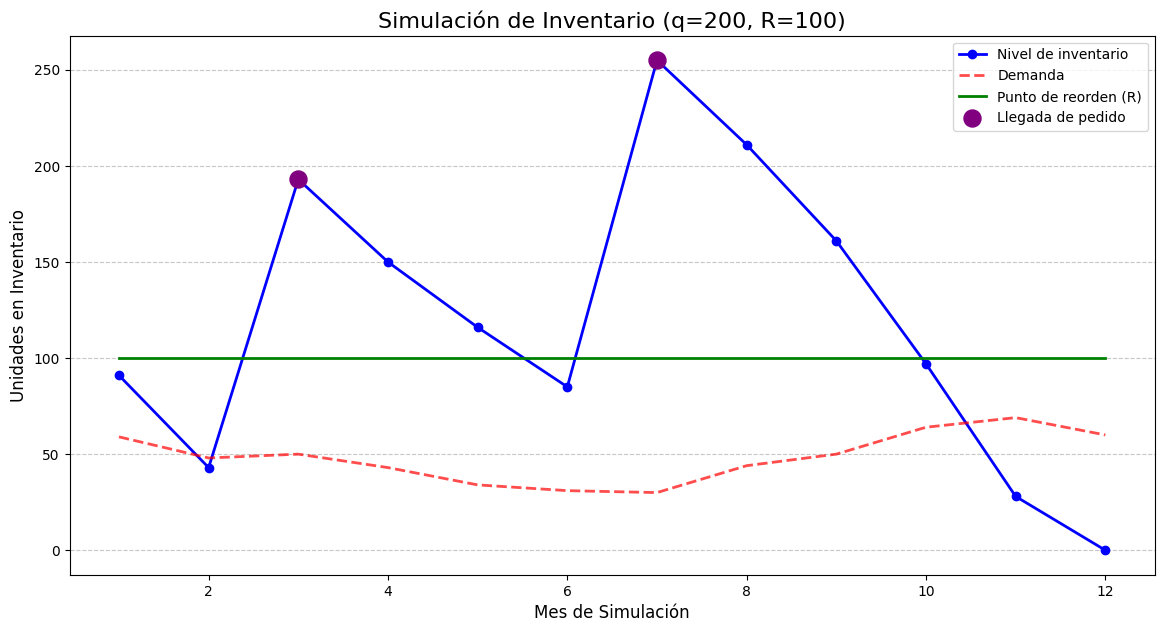

Costo total de la simulación: $4283.33
Cantidad óptima a ordenar (q): 200 unidades
Nivel óptimo de reorden (R): 100 unidades
Mejor cantidad a ordenar (q): 140 unidades
Mejor nivel de reorden (R): 100 unidades
Mejor costo promedio: $3096.98


In [114]:
# Parámetros iniciales
qi = 200
Ri = 100

#Ejecutar simulación con la grafica
costo_sim = simular_inventario_con_grafico(qi, Ri)
print(f"Costo total de la simulación: ${costo_sim:.2f}")
print(f"Cantidad óptima a ordenar (q): {qi} unidades")
print(f"Nivel óptimo de reorden (R): {Ri} unidades")

#Se busca los mejor valores para q y R entre varios valores
valores_q = range(100, 301, 20)
valores_R = range(40, 101, 10)
mejor_q, mejor_R, mejor_costo, resultados = encontrar_parametros_optimos(valores_q, valores_R)

print(f"Mejor cantidad a ordenar (q): {mejor_q} unidades")
print(f"Mejor nivel de reorden (R): {mejor_R} unidades")
print(f"Mejor costo promedio: ${mejor_costo:.2f}")


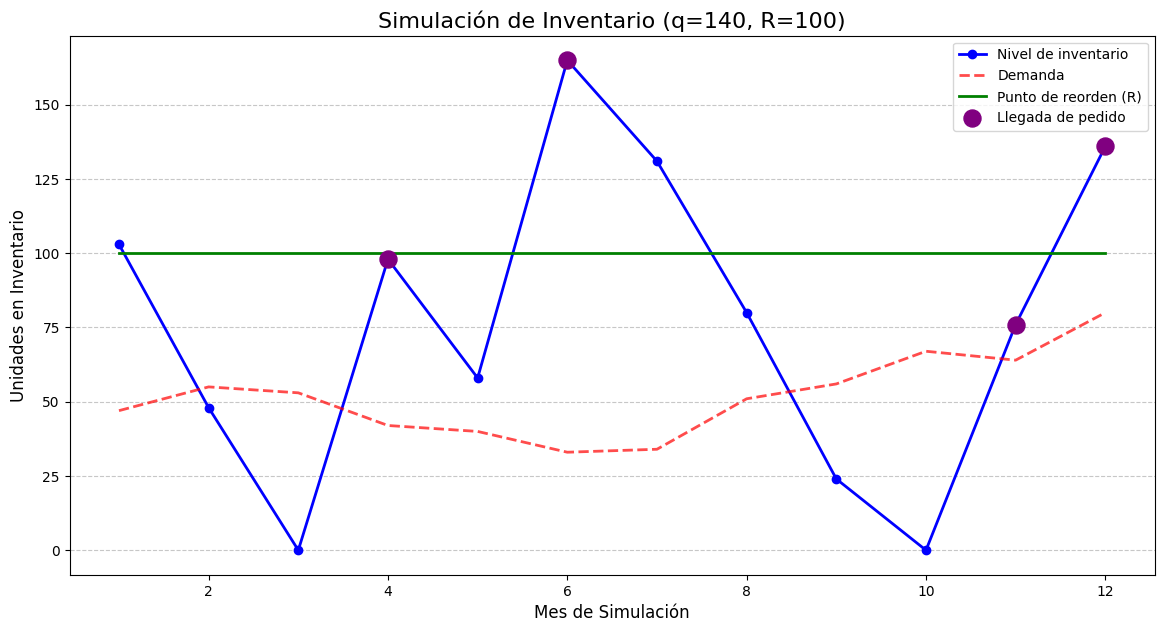

4331.666666666667

In [115]:
#Se grafica con los parámetros óptimos calculados
simular_inventario_con_grafico(mejor_q, mejor_R)

In [117]:
#Profesor Oompa Loompa ahora si tuve que ocupar ayuda de mis compañeros, ahora si me costó entender el ejercici, han sido semanas dificiles